## TensorFlow with Keras

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # scaling data
from tensorflow import keras
from tensorflow.python.keras.models import Sequential # creating & training a model
from tensorflow.python.keras.layers import Dense #Input
#from tensorflow.python.keras.activations import sigmoid
#import tensorflow as tf; tf.keras

In [2]:
# Fix the 'DistributedDatasetInterface' Error
from tensorflow.python.keras.engine import data_adapter
def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)
data_adapter._is_distributed_dataset = _is_distributed_dataset

In [3]:
# DATA INGESTION

# Fetch the data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [4]:
# Check the DataFrame
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
# PREPROCESSING

# Concatenate both training and test data
#data = pd.concat([train_df,test_df]).reset_index(drop=True)

In [6]:
# FEATURE ENGINEERING

# Drop non interested columns
#data.drop(['Name','Cabin'], axis=1, inplace=True)
#data.head()

In [7]:
# split the training and test data again
#train_df = data[data.Survived != -1].reset_index(drop=True) 
#test_df = data[data.Survived == -1].reset_index(drop=True)

In [8]:
# CROSS-VALIDATION

In [9]:
X = train_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].values

y = train_df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train.shape

(596, 5)

In [11]:
X_test.shape

(295, 5)

In [12]:
#help(MinMaxScaler)

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.min()

nan

In [18]:
# BUILDING A MODEL

#help(Sequential)

In [19]:
# Building a model with 3 layers
model=Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) # activation for binary classification problem

model.compile(optimizer='rmsprop', loss='binary_crossentropy') # loss for binary classification problem

In [20]:
from tensorflow.python.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=10)
model.fit(X_train, y_train, epochs=250, callbacks=[early_stop])

Epoch 1/250
19/19 [==============================] - 0s 419us/step - loss: nan
Epoch 2/250
19/19 [==============================] - 0s 382us/step - loss: nan
Epoch 3/250
19/19 [==============================] - 0s 357us/step - loss: nan
Epoch 4/250
19/19 [==============================] - 0s 306us/step - loss: nan
Epoch 5/250
19/19 [==============================] - 0s 279us/step - loss: nan
Epoch 6/250
19/19 [==============================] - 0s 280us/step - loss: nan
Epoch 7/250
19/19 [==============================] - 0s 273us/step - loss: nan
Epoch 8/250
19/19 [==============================] - 0s 268us/step - loss: nan
Epoch 9/250
19/19 [==============================] - 0s 280us/step - loss: nan
Epoch 10/250
19/19 [==============================] - 0s 269us/step - loss: nan


<Axes: >

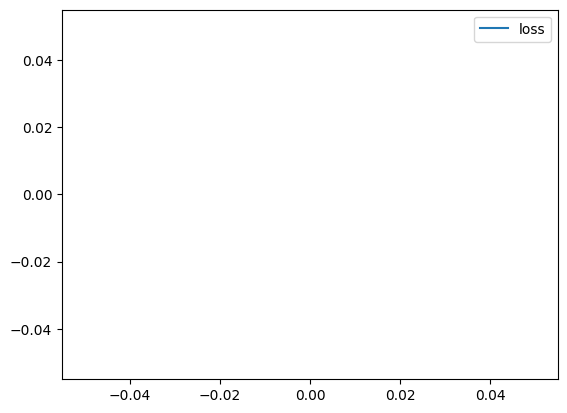

In [21]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

#### Note:
Graph 1 (without early stopping)
- The loss is consistently decreasing, which suggests that the model is learning and improving its performance over time.
- the loss is steadily decreasing, but at a slower rate after a certain point - use early stopping to stop training when the loss plateaus, preventing unnecessary epochs.
- Make sure to monitor performance on a validation set to check for overfitting. If the validation loss starts increasing while the training loss keeps decreasing, it may indicate overfitting.

Graph 2 (with early stopping):
- The loss decreases steadily over time, which is a positive sign that the model is learning and converging as expected.
- The training appears to have stopped before the full 250 epochs, which means early stopping has correctly identified when the model's loss was no longer decreasing significantly. This helps prevent overfitting and saves computational resources.
- The small oscillations are normal and expected in training, especially when using optimizers that adjust the weights dynamically.

In [22]:
# MODEL EVALUATION

# Model's loss on the test set
model.evaluate(X_test, y_test, verbose=0)

nan

In [23]:
# Model's loss on the train set
model.evaluate(X_train, y_train, verbose=0)

nan

In [24]:
test_predictions=model.predict(X_test)
test_predictions.shape

(295, 1)

In [25]:
test_predictions = pd.Series(test_predictions.reshape(295,)) # turn into pandas series
test_predictions

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
290   NaN
291   NaN
292   NaN
293   NaN
294   NaN
Length: 295, dtype: float32

In [26]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df

,Test True Y
0,1
1,0
2,0
3,1
4,1
...,...
290,0
291,0
292,1
293,0


In [27]:
pred_df = pd. concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,1,NaN
...,...,...
290,0,NaN
291,0,NaN
292,1,NaN
293,0,NaN


In [28]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,1,NaN
...,...,...
290,0,NaN
291,0,NaN
292,1,NaN
293,0,NaN


<Axes: >

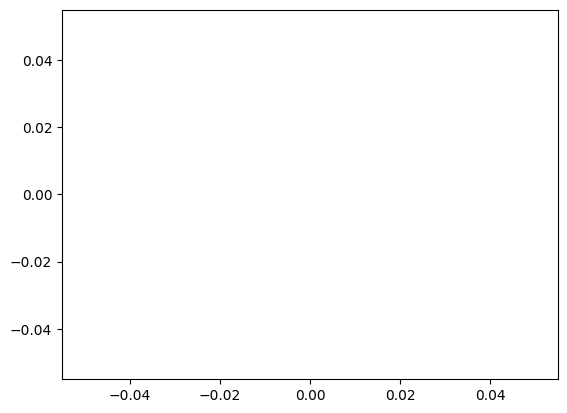

In [29]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

ValueError: Input contains NaN.

In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5 # **0.5 we get root meaen squared error

In [ ]:
# Testing a model on random data
passenger = [[1, 35.0, 51.0000, 0, 1]] # passing features e.g. Pclass, age, fare, SibSp, anad Parch
passenger=scaler.transform(passenger)
model.predict(passenger)